# Numerical Optimization Assignment 1
## Introduction
In this assignment, we expect you to be familiar with optimization library, the numerical calculation package **SciPy**. We are using the Rosenbrock function as the benchmark of our optimization algorithms. Rosenbrock is a simple fourth-order function that has the minimal point at [1,1]. (https://en.wikipedia.org/wiki/Rosenbrock_function) We provide a visualization function which draws the contour.
## Part I : Optimization
1. Please finish the TODO part, which you're going to read the document of SciPy and learn how to minimize function.
    You may refer to the information in the following link: https://docs.scipy.org/doc/scipy/reference/optimize.html
2. Please apply SciPy library of the optimization algorithm of _BFGS_, _Conjugate Gradient_, _Modified Newton's method with conjugate gradient_ with the initilal guess [-2,2].
3. Gradient descent is not included in SciPy package, please implement "Gradient descent with optimal step length".
    Please refer to page 11 of unit 2. 
4. Newton's method is not included in SciPy package, please implement "Pure Newton's method".
    Please refer to page 18 of unit 2.
## Part II : Beale Function
5. Implement partial derivative with Beale function.
    You may refer to the information in the following link: https://en.wikipedia.org/wiki/Test_functions_for_optimization
6. Use your Gradient Descent with Beale Function.
## Report
7. Write a concise report about:
    * Comparing the behavior of these algorithms, include the visualized plot, number of iterarions, step length etc.
    * How do you implement the Gradient descent and Newton's method algorithm.
    * Note: Write your report in the LAST cell of this notebook in Markdown Style. If you are new to Markdown, please check this tutorial link: https://www.markdowntutorial.com/, and Markdown syntax: https://www.markdownguide.org/basic-syntax/
8. Rename this notebook file by adding your student ID and upload it to eeclass platform. (ex. hw1_112xxxxxx.ipynb)
9. Please make sure that clicking "Restart & Run All" will give the result you want to show.

## Import Packages
If you imported extra packages, please mention in your report.

In [1]:
import numpy as np

## Define utility functions

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def visualize_3D(func, xlim=(-3, 3), ylim=(-4.5, 4.5)):
    # create the terrain
    xs = np.linspace(xlim[0], xlim[1],1000)
    ys = np.linspace(ylim[0], ylim[1],1000)
    Xs, Ys = np.meshgrid(xs, ys)
    Zs = func([Xs, Ys])

    # initialize figure
    fig = plt.figure(figsize=(9, 6))

    # plot 3D terrain
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(Xs, Ys, Zs, cmap='rainbow') # plot terrain
    fig.colorbar(surf)
    ax.set_title('3D Visual')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    
    plt.show()

def visualize_2D(func, xlim=(-4, 4), ylim=(-5, 7), gmin=(1, 1), X_iter=None):
    # create the terrain
    xs = np.linspace(xlim[0], xlim[1],1000)
    ys = np.linspace(ylim[0], ylim[1],1000)
    Xs, Ys = np.meshgrid(xs, ys)
    Zs = func([Xs, Ys])

    # initialize figure
    fig = plt.figure(figsize=(10, 4))

    # plot 2D terrain
    ax = fig.add_subplot(111)
    cs = ax.contour(Xs, Ys, Zs, 100, cmap = 'rainbow')
    ax.scatter(gmin[0], gmin[1], color='green', s=100)
    ax.annotate(f'Global Minimum\nat ({gmin[0]}, {gmin[1]})', 
            (gmin[0], gmin[1]),
            xytext=(gmin[0], gmin[1]+1),
            arrowprops=dict(arrowstyle="simple", facecolor='black', linewidth = 0.5, edgecolor=None))
    fig.colorbar(cs)
    ax.set_title('2D Visual')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    # plot the points and arrows if given
    if X_iter:
        # plot the points
        for X in X_iter:
            ax.scatter(X[0], X[1], color = 'r', marker = '.')

        # plot the arrows
        # x_iter = [array([x00, x01]), array([x10, x11]), array([x20, x21]), ...]
        X0_iter = np.array([X[0] for X in X_iter]) # x0_iter = array([x00, x10, x20, ...])
        X1_iter = np.array([X[1] for X in X_iter]) # x1_iter = array([x01, x11, x21, ...])

        anglesx = X0_iter[1:] - X0_iter[:-1]
        anglesy = X1_iter[1:] - X1_iter[:-1]

        for i in range(len(X_iter)-1):
            ax.quiver(X_iter[i][0], X_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

## Visualize the Rosenbrock function

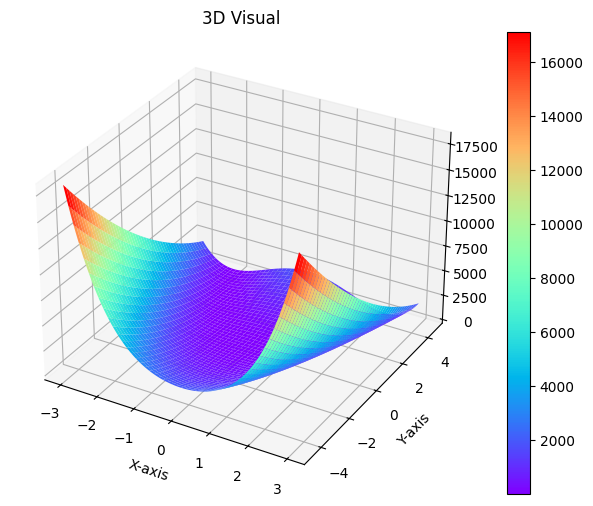

In [3]:
from scipy.optimize import rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

visualize_3D(rosen, xlim=(-3, 3), ylim=(-4.5, 4.5))

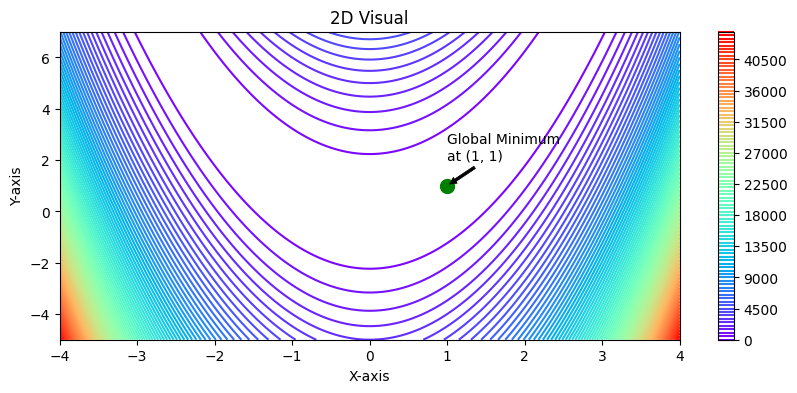

In [4]:
visualize_2D(rosen, xlim=(-4, 4), ylim=(-5, 7), gmin=(1, 1))

# Part I : Optimization

In [5]:
from scipy.optimize import minimize

### // BFGS (10%)

Current function value: 0.000000
Iterations: 35
Function evaluations: 42
Gradient evaluations: 42


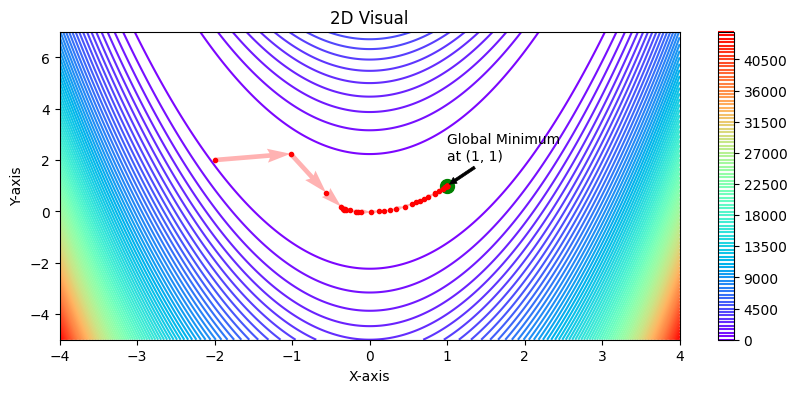

In [6]:
X0 = np.array([-2, 2]) # starting point
X_iter = [X0]
# TODO: Define callback function
# def callback(...):

# TODO: Use BFGS method to minimize the Rosenbrock function (HINT: Hessian will NOT be used in this optimize function)
# result = ...

# TODO: Print out the metrics
# print(f"Current function value: {...}")
# print(f"Iterations: {...}")
# print(f"Function evaluations: {...}")
# print(f"Gradient evaluations: {...}")

# Plot the figure
visualize_2D(rosen, xlim=(-4, 4), ylim=(-5, 7), gmin=(1, 1), X_iter=X_iter)

### // Conjugate Gradient (10%)

Current function value: 0.000000
Iterations: 34
Function evaluations: 78
Gradient evaluations: 78


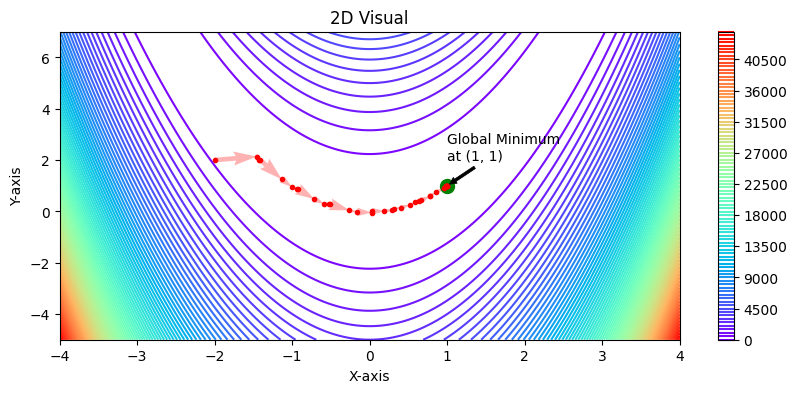

In [7]:
X0 = np.array([-2, 2]) # starting point
X_iter = [X0]
# TODO: Define callback function
# def callback(...):

# TODO: Use BFGS method to minimize the Rosenbrock function (HINT: Hessian will NOT be used in this optimize function)
# result = ...

# TODO: Print out the metrics
# print(f"Current function value: {...}")
# print(f"Iterations: {...}")
# print(f"Function evaluations: {...}")
# print(f"Gradient evaluations: {...}")

# Plot the figure
visualize_2D(rosen, xlim=(-4, 4), ylim=(-5, 7), gmin=(1, 1), X_iter=X_iter)

### // Modified Newton's method with conjugate gradiet (Newton-CG) (10%)

Current function value: 0.000000
Iterations: 277
Function evaluations: 300
Gradient evaluations: 987


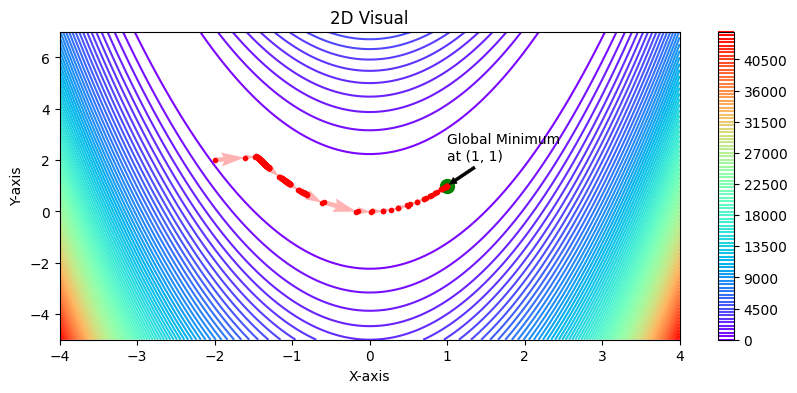

In [8]:
X0 = np.array([-2, 2]) # starting point
X_iter = [X0]
# TODO: Define callback function
# def callback(...):

# TODO: Use BFGS method to minimize the Rosenbrock function (HINT: Hessian will NOT be used in this optimize function)
# result = ...

# TODO: Print out the metrics
# print(f"Current function value: {...}")
# print(f"Iterations: {...}")
# print(f"Function evaluations: {...}")
# print(f"Gradient evaluations: {...}")

# Plot the figure
visualize_2D(rosen, xlim=(-4, 4), ylim=(-5, 7), gmin=(1, 1), X_iter=X_iter)

### // Gradient Descent with optimal step length (20%)

In [9]:
def Gradient_Descent(Func, Grad, X, epsilon=0.00001, nMax = 10000 ):
    X_iter = [X]
    iter_count = 0
    # TODO
    # Input arguments:
        # Func: function to be used, rosen() here
        # Grad: the derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments:
        # x_iter: a list which contains new x for each step of iteration
        # iter_count: an integer, the number of iteration the algorithm taken to convergence

    return X_iter, iter_count

In [ ]:
X0 = np.array([-2,2])
X_iter, iter_count = Gradient_Descent(rosen, rosen_der, X0)
print(f'Iteration Count: {iter_count}')
print(f'At {X_iter[-1]}, the function value is {rosen(X_iter[-1])}')
visualize_2D(rosen, xlim=(-4, 4), ylim=(-5, 7), gmin=(1, 1), X_iter=X_iter)

### // Pure Newton's Method (20%)

In [11]:
def Newton(Grad, Grad2, X, epsilon=0.00001, nMax = 10000):
    X_iter = [X]
    iter_count = 0
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # Grad2: the second derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments: (same as above)
    # Hint: Use numpy.linalg to compute the inverse of a matrix
    
    return X_iter, iter_count

In [ ]:
X0 = np.array([-2,2])
X_iter, iter_count = Newton(rosen_der, rosen_hess, X0)
print(f'Iteration Count: {iter_count}')
print(f'At {X_iter[-1]}, the function value is {rosen(X_iter[-1])}')
visualize_2D(rosen, xlim=(-4, 4), ylim=(-5, 7), gmin=(1, 1), X_iter=X_iter)

# Part II : Beale Function

In [13]:
def beale_func(X):
    """Beale function"""
    x, y = X[0], X[1]
    result = (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
    return result

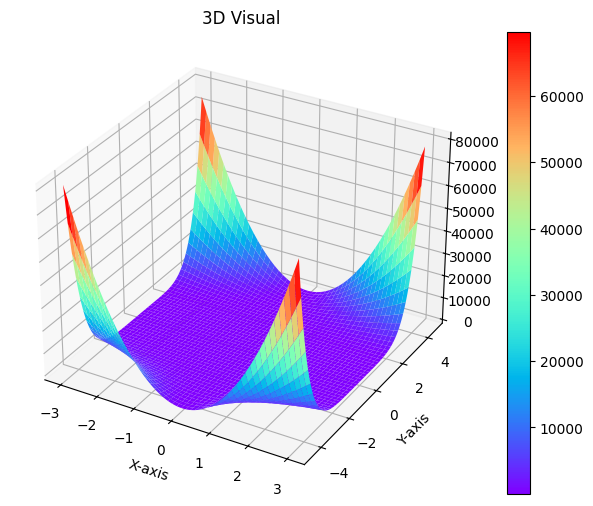

In [14]:
visualize_3D(beale_func, xlim=(-3, 3), ylim=(-4.5, 4.5))

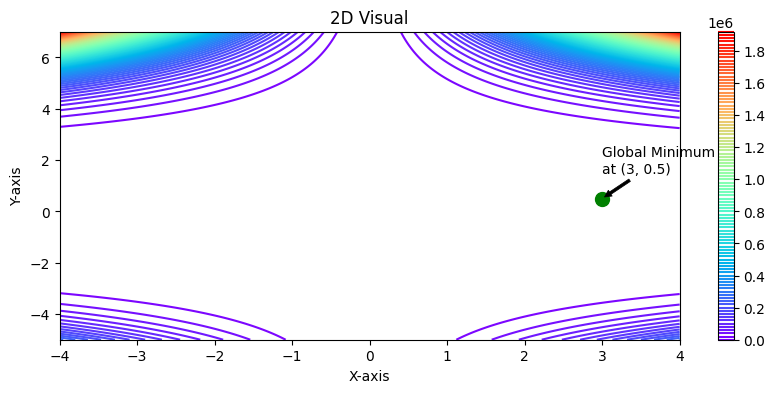

In [15]:
visualize_2D(beale_func, xlim=(-4, 4), ylim=(-5, 7), gmin=(3, 0.5))

### // Implement Beale Function's Derivative (10%)

In [16]:
def beale_der(X):
    """Gradient of the Beale function"""
    x, y = X[0], X[1]
    # TODO: Calculate partial derivative for Beale Function
    # dx = ...
    # dy = ...
    return np.array([dx, dy])

### // Use Your Gradient Descent with Beale Function (10%)

In [ ]:
X0 = np.array([-2, -2]) # starting point
X_iter, iter_count = Gradient_Descent(beale_func, beale_der, X0)
print(f'Iteration Count: {iter_count}')
print(f'At {X_iter[-1]}, the function value is {beale_func(X_iter[-1])}')

# Plot the figure
visualize_2D(beale_func, xlim=(-4, 4), ylim=(-5, 7), gmin=(3, 0.5), X_iter=X_iter)

## Report (10%)

Please type your report here.